<a href="https://colab.research.google.com/github/SERVIR/Explore_GEDI_EarthRISE_Training/blob/main/Copy_of_L2B_PAI_GEDI_LAS_Comp_Sewanee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

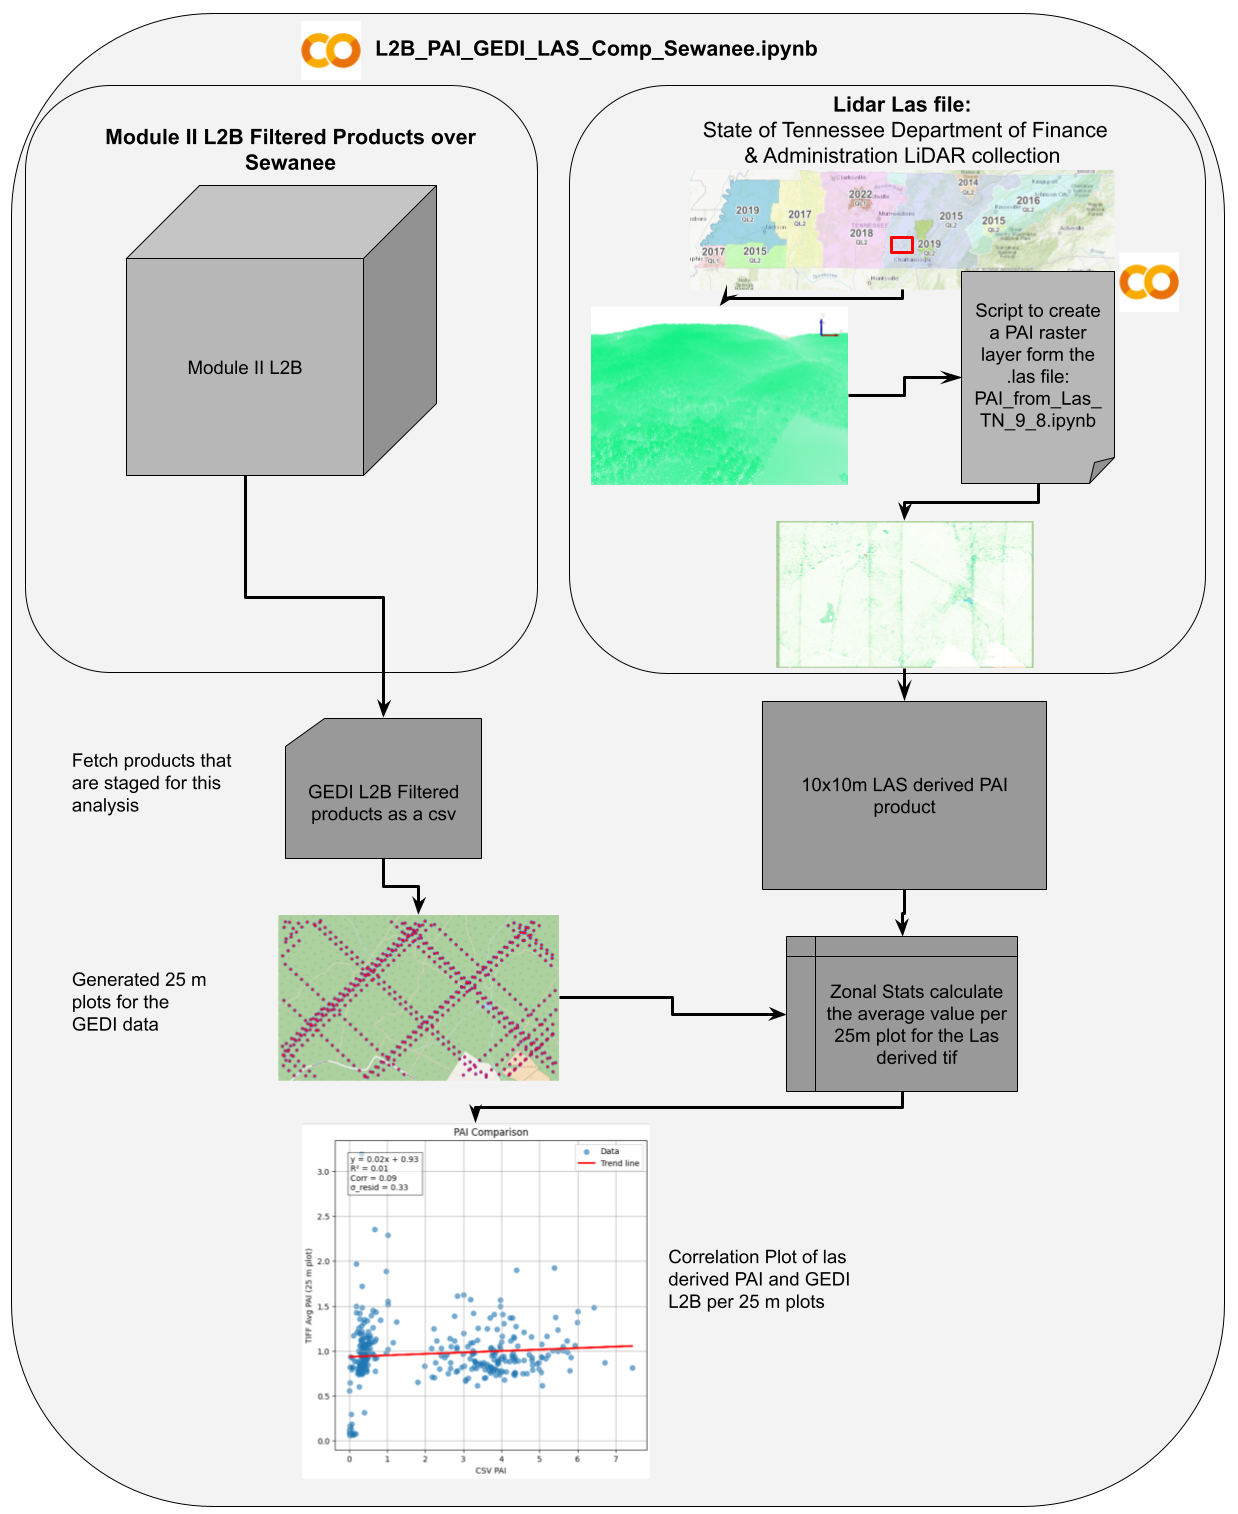

Contact Info
Email: timothy.j.mayer@nasa.gov

Organization: EarthRISE

Website: XXXXXXXX

For additional scientific background, examples, and resources on GEDI and its applications: https://servir.github.io/GEDI_Earthhub_ARSET_Training/

Date last modified: 09-10-2025

Funding for this work was provided through the cooperative agreement 80MSFC22N0004 between NASA and UAH. SERVIR is a joint NASA- and USAID-led program.

# Prep Working Folders

Note these files and processsing is "heavy" so we are using GDrive instead of the temp Colab space. This is to help with checkpoints in files. If the ram crashes the expored files can be grabbed form GDrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pwd

/content


In [ ]:
!mkdir /content/drive/MyDrive/GEDI_LAS_Comp

In [ ]:
%cd /content/drive/MyDrive/GEDI_LAS_Comp

/content/drive/MyDrive/GEDI_LAS_Comp


In [ ]:
!pwd

/content/drive/MyDrive/GEDI_LAS_Comp


In [ ]:
path = "/content/drive/MyDrive/GEDI_LAS_Comp"

# Environment Set-up

In [ ]:
!pip install laspy pyproj open3d plotly rasterio rasterstats shapely matplotlib folium geopandas


In [ ]:
import laspy
from pyproj import CRS
import os
import requests
import numpy as np
import matplotlib.pyplot as plt
import glob
import shutil
import plotly.graph_objects as go
import pandas as pd
import glob
from shapely.geometry import Point
import geopandas as gpd

# Fetch and Derived PAI

See the ipynb and zenodo description fo rmore details on the product

Fetch Derived PAI

[![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.17079144.svg)](https://doi.org/10.5281/zenodo.17079144)


In [ ]:
import requests
import os
import zipfile
from google.colab import drive



# . Set target folder
target_dir = "/content/drive/MyDrive/GEDI_LAS_Comp"
os.makedirs(target_dir, exist_ok=True)

# . Zenodo record ID
record_id = "17079144"

# . Fetch record metadata
r = requests.get(f"https://zenodo.org/api/records/{record_id}")
r.raise_for_status()
files = r.json()['files']

# . Download each file
for file_info in files:
    filename = file_info['key']
    download_url = file_info['links']['self']
    file_path = os.path.join(target_dir, filename)

    print(f"Downloading {filename} ...")
    with requests.get(download_url, stream=True) as r_file:
        r_file.raise_for_status()
        with open(file_path, 'wb') as f:
            for chunk in r_file.iter_content(chunk_size=8192):
                f.write(chunk)
    print(f"Downloaded: {filename}")

    # 6. If ZIP file, extract it
    if filename.endswith(".zip"):
        print(f"Extracting {filename} ...")
        with zipfile.ZipFile(file_path, 'r') as zip_ref:
            zip_ref.extractall(target_dir)
        print(f"Extraction completed for {filename}")


In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Load CSV
csv_path = '/content/drive/MyDrive/GEDI_LAS_Comp/Sewanee_Domain_GEDI02_B_GEDI02_B_filt.csv'
df = pd.read_csv(csv_path, sep=',')  # tab-separated based on your example

# Create GeoDataFrame from lat/lon
gdf = gpd.GeoDataFrame(df,
                       geometry=gpd.points_from_xy(df['lon'], df['lat']),
                       crs='EPSG:4326')  # WGS84


In [ ]:
gdf

,lat,lon,geolocation/solar_elevation,geolocation/local_beam_elevation,selected_l2a_algorithm,geolocation/degrade_flag,l2b_quality_flag,geolocation/digital_elevation_model,geolocation/elev_lowestmode,geolocation/elev_highestreturn,...,pavd_z,cover,cover_z,product,Beam,fileName,date,Beam_Type,AOI,geometry
0,35.230753,-85.989273,6.302411,1.496346,2,0,1,488.595062,469.876038,498.688507,...,"[0.23534557223320007, 0.2009992003440857, 0.17...",0.890477,"[0.8903491497039795, 0.804418683052063, 0.7044...",GEDI_L2B,BEAM0010,GEDI02_B_2024169103448_O31228_02_T05264_02_004...,2024-06-17,Coverage,Sewanee_Domain_GEDI02_B,POINT (-85.98927 35.23075)
1,35.231110,-85.988802,6.302933,1.496346,2,0,1,488.595062,487.756012,513.952576,...,"[0.22372138500213623, 0.2380671203136444, 0.24...",0.908667,"[0.9086666107177734, 0.84205162525177, 0.70505...",GEDI_L2B,BEAM0010,GEDI02_B_2024169103448_O31228_02_T05264_02_004...,2024-06-17,Coverage,Sewanee_Domain_GEDI02_B,POINT (-85.9888 35.23111)
2,35.231465,-85.988333,6.303455,1.496347,2,0,1,518.880188,500.006073,528.669067,...,"[0.10372597724199295, 0.13118664920330048, 0.1...",0.899972,"[0.899565577507019, 0.8705615997314453, 0.8086...",GEDI_L2B,BEAM0010,GEDI02_B_2024169103448_O31228_02_T05264_02_004...,2024-06-17,Coverage,Sewanee_Domain_GEDI02_B,POINT (-85.98833 35.23147)
3,35.231823,-85.987862,6.303974,1.496347,2,0,1,528.466675,517.767456,538.321106,...,"[0.19986823201179504, 0.2467811554670334, 0.31...",0.908139,"[0.9079335927963257, 0.8498492240905762, 0.689...",GEDI_L2B,BEAM0010,GEDI02_B_2024169103448_O31228_02_T05264_02_004...,2024-06-17,Coverage,Sewanee_Domain_GEDI02_B,POINT (-85.98786 35.23182)
4,35.232178,-85.987394,6.304492,1.496347,2,0,1,533.974304,529.207642,548.079651,...,"[0.20133158564567566, 0.24455709755420685, 0.2...",0.847069,"[0.8462313413619995, 0.7470957040786743, 0.482...",GEDI_L2B,BEAM0010,GEDI02_B_2024169103448_O31228_02_T05264_02_004...,2024-06-17,Coverage,Sewanee_Domain_GEDI02_B,POINT (-85.98739 35.23218)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11606,35.169725,-85.859239,8.667745,1.543402,2,0,1,534.340332,516.074463,546.895935,...,"[0.049275320023298264, 0.09354183822870255, 0....",0.866127,"[0.8661274313926697, 0.848619282245636, 0.7864...",GEDI_L2B,BEAM1011,GEDI02_B_2022289120454_O21768_02_T09533_02_003...,2022-10-16,Power,Sewanee_Domain_GEDI02_B,POINT (-85.85924 35.16973)
11607,35.170074,-85.858778,8.668024,1.543402,2,0,1,534.340332,517.672363,547.819702,...,"[0.05718633532524109, 0.08482596278190613, 0.1...",0.857450,"[0.8574496507644653, 0.8355898857116699, 0.782...",GEDI_L2B,BEAM1011,GEDI02_B_2022289120454_O21768_02_T09533_02_003...,2022-10-16,Power,Sewanee_Domain_GEDI02_B,POINT (-85.85878 35.17007)
11608,35.170425,-85.858316,8.668304,1.543402,2,0,1,541.804138,529.444031,550.640869,...,"[0.02774546854197979, 0.06042185425758362, 0.1...",0.717542,"[0.7175419330596924, 0.6972731947898865, 0.618...",GEDI_L2B,BEAM1011,GEDI02_B_2022289120454_O21768_02_T09533_02_003...,2022-10-16,Power,Sewanee_Domain_GEDI02_B,POINT (-85.85832 35.17042)
11609,35.170774,-85.857855,8.668584,1.543402,2,0,1,539.671265,531.997742,552.820007,...,"[0.04797375574707985, 0.07368183135986328, 0.1...",0.613093,"[0.613092839717865, 0.5638202428817749, 0.4408...",GEDI_L2B,BEAM1011,GEDI02_B_2022289120454_O21768_02_T09533_02_003...,2022-10-16,Power,Sewanee_Domain_GEDI02_B,POINT (-85.85785 35.17077)


In [ ]:
# Reproject to TIFF CRS
tif_crs = 'EPSG:6576'
gdf_proj = gdf.to_crs(tif_crs)


# Create 25 Plots to match the GEDI observations

In [ ]:
# Create 25m radius square (12.5 m buffer in each direction)
gdf_proj['plot'] = gdf_proj.geometry.buffer(12.5)  # buffer in units of CRS (ft)
# Note: 1 ft ≈ 0.3048 m, so 25 m ≈ 82 ft
# Adjust buffer if you want exactly 25 m in projected CRS:
gdf_proj['plot'] = gdf_proj.geometry.buffer(82/2)  # 82 ft ~ 25 m


In [ ]:
gdf_proj

,lat,lon,geolocation/solar_elevation,geolocation/local_beam_elevation,selected_l2a_algorithm,geolocation/degrade_flag,l2b_quality_flag,geolocation/digital_elevation_model,geolocation/elev_lowestmode,geolocation/elev_highestreturn,...,cover,cover_z,product,Beam,fileName,date,Beam_Type,AOI,geometry,plot
0,35.230753,-85.989273,6.302411,1.496346,2,0,1,488.595062,469.876038,498.688507,...,0.890477,"[0.8903491497039795, 0.804418683052063, 0.7044...",GEDI_L2B,BEAM0010,GEDI02_B_2024169103448_O31228_02_T05264_02_004...,2024-06-17,Coverage,Sewanee_Domain_GEDI02_B,POINT (1971703.649 326669.951),"POLYGON ((1971744.649 326669.951, 1971744.452 ..."
1,35.231110,-85.988802,6.302933,1.496346,2,0,1,488.595062,487.756012,513.952576,...,0.908667,"[0.9086666107177734, 0.84205162525177, 0.70505...",GEDI_L2B,BEAM0010,GEDI02_B_2024169103448_O31228_02_T05264_02_004...,2024-06-17,Coverage,Sewanee_Domain_GEDI02_B,POINT (1971844.498 326800.161),"POLYGON ((1971885.498 326800.161, 1971885.3 32..."
2,35.231465,-85.988333,6.303455,1.496347,2,0,1,518.880188,500.006073,528.669067,...,0.899972,"[0.899565577507019, 0.8705615997314453, 0.8086...",GEDI_L2B,BEAM0010,GEDI02_B_2024169103448_O31228_02_T05264_02_004...,2024-06-17,Coverage,Sewanee_Domain_GEDI02_B,POINT (1971984.314 326929.44),"POLYGON ((1972025.314 326929.44, 1972025.116 3..."
3,35.231823,-85.987862,6.303974,1.496347,2,0,1,528.466675,517.767456,538.321106,...,0.908139,"[0.9079335927963257, 0.8498492240905762, 0.689...",GEDI_L2B,BEAM0010,GEDI02_B_2024169103448_O31228_02_T05264_02_004...,2024-06-17,Coverage,Sewanee_Domain_GEDI02_B,POINT (1972125.141 327059.59),"POLYGON ((1972166.141 327059.59, 1972165.943 3..."
4,35.232178,-85.987394,6.304492,1.496347,2,0,1,533.974304,529.207642,548.079651,...,0.847069,"[0.8462313413619995, 0.7470957040786743, 0.482...",GEDI_L2B,BEAM0010,GEDI02_B_2024169103448_O31228_02_T05264_02_004...,2024-06-17,Coverage,Sewanee_Domain_GEDI02_B,POINT (1972264.807 327188.698),"POLYGON ((1972305.807 327188.698, 1972305.61 3..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11606,35.169725,-85.859239,8.667745,1.543402,2,0,1,534.340332,516.074463,546.895935,...,0.866127,"[0.8661274313926697, 0.848619282245636, 0.7864...",GEDI_L2B,BEAM1011,GEDI02_B_2022289120454_O21768_02_T09533_02_003...,2022-10-16,Power,Sewanee_Domain_GEDI02_B,POINT (2010571.482 304486.462),"POLYGON ((2010612.482 304486.462, 2010612.285 ..."
11607,35.170074,-85.858778,8.668024,1.543402,2,0,1,534.340332,517.672363,547.819702,...,0.857450,"[0.8574496507644653, 0.8355898857116699, 0.782...",GEDI_L2B,BEAM1011,GEDI02_B_2022289120454_O21768_02_T09533_02_003...,2022-10-16,Power,Sewanee_Domain_GEDI02_B,POINT (2010708.998 304613.629),"POLYGON ((2010749.998 304613.629, 2010749.8 30..."
11608,35.170425,-85.858316,8.668304,1.543402,2,0,1,541.804138,529.444031,550.640869,...,0.717542,"[0.7175419330596924, 0.6972731947898865, 0.618...",GEDI_L2B,BEAM1011,GEDI02_B_2022289120454_O21768_02_T09533_02_003...,2022-10-16,Power,Sewanee_Domain_GEDI02_B,POINT (2010847.092 304741.524),"POLYGON ((2010888.092 304741.524, 2010887.895 ..."
11609,35.170774,-85.857855,8.668584,1.543402,2,0,1,539.671265,531.997742,552.820007,...,0.613093,"[0.613092839717865, 0.5638202428817749, 0.4408...",GEDI_L2B,BEAM1011,GEDI02_B_2022289120454_O21768_02_T09533_02_003...,2022-10-16,Power,Sewanee_Domain_GEDI02_B,POINT (2010984.665 304868.798),"POLYGON ((2011025.665 304868.798, 2011025.468 ..."


#Zonal Stats avergaing the 10m Las pai to the 25m GEDI plots

In [ ]:
import rasterio
from rasterstats import zonal_stats

tif_path = '/content/drive/MyDrive/GEDI_LAS_Comp/1982317NW_PAI_10m_9_8.tif'

# Calculate zonal stats
stats = zonal_stats(gdf_proj['plot'], tif_path, stats=['mean'], nodata=-9999)
gdf_proj['avg_las_pai'] = [s['mean'] for s in stats]


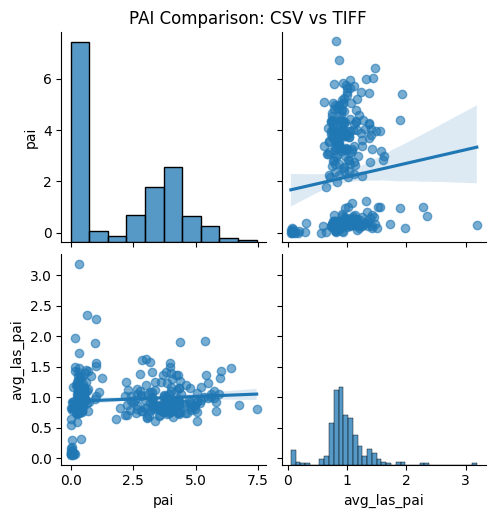

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop rows with NaN in either column
df_plot = gdf_proj.dropna(subset=['pai', 'avg_las_pai'])

# Select only the two columns
df_plot = df_plot[['pai', 'avg_las_pai']]

# Pair plot
sns.pairplot(df_plot, kind='reg', plot_kws={'scatter_kws': {'alpha':0.6}})
plt.suptitle('PAI Comparison: CSV vs TIFF', y=1.02)
plt.show()


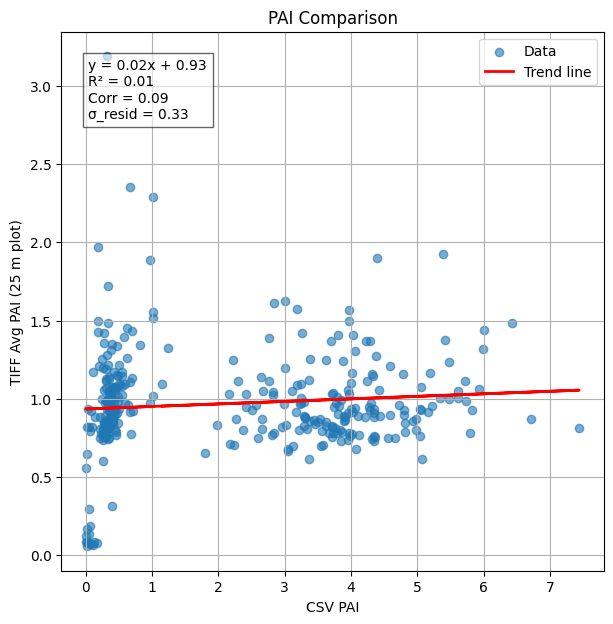

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Drop any NaNs
df_corr = gdf_proj.dropna(subset=['pai', 'avg_las_pai'])

# Extract x and y
x = df_corr['pai'].values.reshape(-1, 1)
y = df_corr['avg_las_pai'].values

# Linear regression
reg = LinearRegression().fit(x, y)
y_pred = reg.predict(x)

# Compute R^2
r2 = reg.score(x, y)

# Compute standard deviation of residuals
residuals = y - y_pred
std_resid = np.std(residuals)

# Correlation
corr = np.corrcoef(df_corr['pai'], df_corr['avg_las_pai'])[0,1]

# Scatter plot with trend line
plt.figure(figsize=(7,7))
plt.scatter(x, y, alpha=0.6, label='Data')
plt.plot(x, y_pred, color='red', linewidth=2, label='Trend line')
plt.xlabel('CSV PAI')
plt.ylabel('TIFF Avg PAI (25 m plot)')
plt.title('PAI Comparison')

# Add equation and metrics on plot
eq_text = f'y = {reg.coef_[0]:.2f}x + {reg.intercept_:.2f}\nR² = {r2:.2f}\nCorr = {corr:.2f}\nσ_resid = {std_resid:.2f}'
plt.text(0.05, 0.95, eq_text, transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.6))

plt.grid(True)
plt.legend()
plt.show()


Contact Info
Email: timothy.j.mayer@nasa.gov

Organization: EarthRISE

Website: XXXXXXXX

For additional scientific background, examples, and resources on GEDI and its applications: https://servir.github.io/GEDI_Earthhub_ARSET_Training/

Date last modified: 09-10-2025

Funding for this work was provided through the cooperative agreement 80MSFC22N0004 between NASA and UAH. SERVIR is a joint NASA- and USAID-led program.